# Programming assignment #5

- Course: CHE1147H - Data Mining in Engineering
- Name: Kecheng Xiao
- ID: 1008709140

# 1 Supervised learning
## 1.1 Import the monthly and annual data and join

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
# read .xlsx and .csv file
tb1_a = pd.read_excel('annual_features.xlsx', sheet_name='Sheet1')
tb2_a = pd.read_excel('annual_day_of_week_counts_pivot.xlsx', sheet_name='Sheet1')
tb1_m = pd.read_excel('mth_rolling_features.xlsx', sheet_name='Sheet1')
tb2_m = pd.read_excel('mth_day_counts.xlsx', sheet_name='Sheet1')
tb3_m = pd.read_excel('days_since_last_txn.xlsx', sheet_name='Sheet1')

In [4]:
tb_r = pd.read_csv('Retail_Data_Response.csv')

In [5]:
# get annual data
annual_features_outputs = pd.merge(pd.merge(tb1_a, tb2_a, on='customer_id'), tb_r, on='customer_id')
annual_features_outputs

,customer_id,ann_txn_amt_ave_2011,ann_txn_amt_ave_2012,ann_txn_amt_ave_2013,ann_txn_amt_ave_2014,ann_txn_amt_ave_2015,ann_txn_amt_cnt_2011,ann_txn_amt_cnt_2012,ann_txn_amt_cnt_2013,ann_txn_amt_cnt_2014,...,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday,response
0,CS1112,70.666667,67.400000,70.666667,70.666667,39.000000,3,5,3,3,...,1,1,0,0,0,0,0,0,1,0
1,CS1113,81.333333,74.800000,85.200000,56.500000,73.333333,3,5,5,4,...,3,0,0,2,0,0,0,0,1,0
2,CS1114,85.200000,75.000000,70.400000,70.833333,79.000000,5,2,5,6,...,1,1,0,0,0,0,1,0,0,1
3,CS1115,87.000000,67.571429,79.571429,78.250000,55.000000,3,7,7,4,...,0,2,0,0,0,0,1,0,0,1
4,CS1116,58.750000,76.666667,59.000000,66.600000,0.000000,4,3,1,5,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6879,CS8996,31.000000,33.666667,41.500000,56.000000,0.000000,2,3,2,6,...,1,2,0,0,0,0,0,0,0,0
6880,CS8997,45.000000,39.500000,35.166667,42.000000,0.000000,2,4,6,2,...,0,0,0,0,0,0,0,0,0,0
6881,CS8998,64.000000,54.400000,47.000000,32.500000,0.000000,2,5,2,4,...,1,1,0,0,0,0,0,0,0,0
6882,CS8999,52.000000,25.250000,28.000000,21.000000,0.000000,3,4,3,2,...,0,2,0,0,0,0,0,0,0,0


In [6]:
# get monthly data
tb_r.rename(columns={'customer_id': 'CLNT_NO'}, inplace=True) # rename to regularize
monthly_features_outputs = pd.merge(pd.merge(pd.merge(tb1_m, tb2_m, on=['CLNT_NO', 'ME_DT']), tb3_m, on=['CLNT_NO', 'ME_DT']), tb_r, on='CLNT_NO')
monthly_features_outputs.dropna(inplace=True) # drop redundant NaN due to window size
monthly_features_outputs.drop(columns=['Unnamed: 0', 'Unnamed: 0_x', 'Unnamed: 0_y'], inplace=True) # drop old index
monthly_features_outputs

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_amt_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,...,txn_cnt_max_12M,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday,days_since_last_txn,response
11,CS1112,2012-04-30,56,1,56.0,18.666667,56.0,1.0,0.333333,1.0,...,1.0,0,0,0,1,0,0,0,22,0
12,CS1112,2012-05-31,0,0,56.0,18.666667,56.0,1.0,0.333333,1.0,...,1.0,0,0,0,0,0,0,0,53,0
13,CS1112,2012-06-30,52,1,108.0,36.000000,56.0,2.0,0.666667,1.0,...,1.0,0,0,0,1,0,0,0,6,0
14,CS1112,2012-07-31,81,1,133.0,44.333333,81.0,2.0,0.666667,1.0,...,1.0,0,0,0,0,0,1,0,28,0
15,CS1112,2012-08-31,0,0,133.0,44.333333,81.0,2.0,0.666667,1.0,...,1.0,0,0,0,0,0,0,0,59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323543,CS9000,2014-11-30,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,1.0,0,0,0,0,0,0,0,98,0
323544,CS9000,2014-12-31,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,1.0,0,0,0,0,0,0,0,129,0
323545,CS9000,2015-01-31,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,1.0,0,0,0,0,0,0,0,160,0
323546,CS9000,2015-02-28,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,1.0,0,0,0,0,0,0,0,188,0


## 1.2 Steps for each method

### Data Preprocess (Step 1 to 3)

In [7]:
# Step 1: Separate the inputs X and the output y in two data frames
# Annual X and y
X_annual = annual_features_outputs.drop(columns=['customer_id', 'response']).astype(float)
y_annual = annual_features_outputs['response']

# Monthly X and y
X_monthly = monthly_features_outputs.drop(columns=['CLNT_NO', 'ME_DT', 'response']).astype(float)
y_monthly = monthly_features_outputs['response']

In [8]:
# Step 2: Split the data in train and test set
X_train_annual, X_test_annual, y_train_annual, y_test_annual = \
    train_test_split(X_annual, y_annual, test_size=2/3, random_state=1147)
X_train_monthly, X_test_monthly, y_train_monthly, y_test_monthly = \
    train_test_split(X_monthly, y_monthly, test_size=2/3, random_state=1147)

In [9]:
# Step 3: Pre-process
# standardize annual data
scaler = StandardScaler()
X_train_annual_scaled = scaler.fit_transform(X_train_annual)
X_test_annual_scaled = scaler.transform(X_test_annual)

# standardize monthly data
scaler = StandardScaler()
X_train_monthly_scaled = scaler.fit_transform(X_train_monthly)
X_test_monthly_scaled = scaler.transform(X_test_monthly)

### Logistic Model with L1 Norm(Lasso) for Annual

In [41]:
# Step 4: Fit the training dataset and optimize the hyperparameters of the method
def optimized_lasso(dataset='annual'):
    # input check
    assert dataset=='annual' or dataset=='monthly', f"dataset can only be 'annual' or 'monthly'."

    # change dataset
    if dataset=='annual':
        X_train_scaled, y_train = X_train_annual_scaled, y_train_annual
        X_test_scaled, y_test = X_test_annual_scaled, y_test_annual
    else:
        X_train_scaled, y_train = X_train_monthly_scaled, y_train_monthly
        X_test_scaled, y_test = X_test_monthly_scaled, y_test_monthly

    # smaller values, stronger regularization, more coefficients will go to zero
    c_list = np.linspace(0.001, 0.1, 20)
    
    # initialize the variables you want to save in an iterative manner
    count                  = 0
    train_auc_iter         = np.zeros(shape=(len(c_list),1))
    test_auc_iter          = np.zeros(shape=(len(c_list),1))

    # loop for all possible c values
    for c in c_list:
        # instantiate a logistic regression model, and fit with X and y
        model_lr = LogisticRegression(C=c, penalty='l1', class_weight='balanced',
                                      solver="liblinear", random_state=1147)
        # fit the model
        model_lr.fit(X_train_scaled, y_train)
        # scores for train set
        scores_train_lr = model_lr.predict_proba(X_train_scaled)[:, 1]
        # scores for test set
        scores_test_lr = model_lr.predict_proba(X_test_scaled)[:, 1]
    
        # Training ROC Calc
        fpr_train_lr, tpr_train_lr, _ = roc_curve(y_train, scores_train_lr)
        # Training AUC Calc
        auc_train_lr = auc(fpr_train_lr, tpr_train_lr)
        train_auc_iter[count,0] = auc_train_lr
        # Testing ROC Calc
        fpr_test_lr, tpr_test_lr, _ = roc_curve(y_test, scores_test_lr)
        # Testing AUC Calc
        auc_test_lr = auc(fpr_test_lr, tpr_test_lr)
        test_auc_iter[count,0] = auc_test_lr
        # next count value for iteration
        count += 1
    
    # optimize c for Lasso regression
    ind_c = pd.DataFrame(test_auc_iter).idxmax()[0]
    print('Optimized Lasso with C = %.2f and Testing AUC = %.3f'
          %(c_list[ind_c], max(test_auc_iter)))
    # model with optimized c
    model_lr = LogisticRegression(C=c_list[ind_c], penalty='l1', class_weight='balanced', solver="liblinear")
    model_lr.fit(X_train_scaled, y_train)

    # return best model
    return model_lr

In [42]:
# Helper to check dataset condition
def check_dataset(dataset, standardize):
    # input check
    assert dataset=='annual' or dataset=='monthly', f"dataset can only be 'annual' or 'monthly'."
    # change dataset
    if dataset=='annual' and standardize:
        X_train, y_train = X_train_annual_scaled, y_train_annual
        X_test, y_test = X_test_annual_scaled, y_test_annual
    elif dataset=='monthly' and standardize:
        X_train, y_train = X_train_monthly_scaled, y_train_monthly
        X_test, y_test = X_test_monthly_scaled, y_test_monthly
    elif dataset=='annual' and not standardize:
        X_train, y_train = X_train_annual, y_train_annual
        X_test, y_test = X_test_annual, y_test_annual
    else:
        X_train, y_train = X_train_monthly, y_train_monthly
        X_test, y_test = X_test_monthly, y_test_monthly
    return X_train, y_train, X_test, y_test

In [43]:
# Step 5: Plot coeﬃcient values or feature importance
def plot_coefficient(model, dataset='annual', is_tree=False):
    # input check
    X_train, _, _, _ = check_dataset(dataset, standardize=False)

    # plot
    plt.figure(figsize=(18,9))
    if not is_tree:
        ind_sort = np.argsort(abs(model.coef_[0]))[::-1]
        names = [X_train.columns[i] for i in ind_sort]
        plt.bar(names, model.coef_[0][ind_sort])
        count = sum(abs(model.coef_[0]) > 0)
    else:
        ind_sort = np.argsort(abs(model.feature_importances_))[::-1]
        names = [X_train.columns[i] for i in ind_sort]
        plt.bar(names, model.feature_importances_[ind_sort])
        count = sum(abs(model.feature_importances_) > 0)
    plt.xticks(rotation=90)
    plt.title('Coefficient Plot with %d Features' % count, fontsize = 18)
    plt.show()

In [44]:
# Step 6: Plot probability distribution for test set
def plot_prob_distribution_testing(model, dataset='annual', standardize=True):
    # input check
    _, _, X_test, _ = check_dataset(dataset, standardize)
    # plot
    y_test_proba = model.predict_proba(X_test)

    # sns.displot(data = y_test_proba[:,1], x = 100*y_test_proba[:,1])
    sns.displot(data = y_test_proba[:,1], height=8.2)
    plt.title('Distribution of Probabilities', fontsize = 18)
    plt.xlabel('Probability to default (%)')
    plt.ylabel('Counts of clients')
    plt.show()

In [45]:
# Step 7: Plot confusion matrix and ROC curves of train/test set and calculate precision/recall
def plot_cm_roc(model, dataset='annual', standardize=True):
    # input check
    X_train, y_train, X_test, y_test = check_dataset(dataset, standardize)

    # Testing set
    # plot confusion matrix
    y_test_predicted = model.predict(X_test)
    cm = confusion_matrix(y_test, y_test_predicted)
    # plot confusion matrix
    plt.figure(figsize=(9,9))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    classNames = ['Negative','Positive']
    plt.title('Confusion Matrix - Test Data', fontsize = 18)
    # report precision and recall
    txt_precision_recall = 'Test Precis: %.3f \nTest Recall: %.3f'\
                           %(precision_score(y_test, y_test_predicted), recall_score(y_test, y_test_predicted))
    plt.ylabel('True label', fontsize = 18)
    plt.xlabel('Predicted label\n\n'+str(txt_precision_recall), fontsize = 18)
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    thresh = cm.max() / 2.
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 20,
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.show()

    # Training set
    y_train_predicted = model.predict(X_train)
    cm = confusion_matrix(y_train, y_train_predicted)
    # plot confusion matrix
    plt.figure(figsize=(9,9))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    classNames = ['Negative','Positive']
    plt.title('Confusion Matrix - Train Data', fontsize = 18)
    # report precision and recall
    txt_precision_recall = 'Train Precis: %.3f \nTrain Recall: %.3f'\
                           %(precision_score(y_train, y_train_predicted), recall_score(y_train, y_train_predicted))
    plt.ylabel('True label', fontsize = 18)
    plt.xlabel('Predicted label\n\n'+str(txt_precision_recall), fontsize = 18)
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    thresh = cm.max() / 2.
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 20,
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.show()

    # plot
    # ROC Calc Train set
    fpr_train, tpr_train, _ = roc_curve(y_train, model.predict_proba(X_train)[:, 1])
    # ROC Calc Test set
    fpr_test, tpr_test, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    # AUC Calc
    auc_train = auc(fpr_train, tpr_train)
    # AUC Calc
    auc_test  = auc(fpr_test, tpr_test)

    # Plotting
    plt.figure(figsize=(9.2,9.2))
    plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train))
    plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test))
    plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5')
    plt.ylim([0,1.0])
    plt.xlim([0,1.0])
    plt.title('ROC curves', fontsize = 18)
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')
    plt.legend()
    plt.show()

In [46]:
# Step 8: Plot decision boundary for top 2 features
warnings.filterwarnings("ignore")
def plot_decision_boundary(model, dataset='annual', standardize=True, is_tree=False):
    # input check
    X_train, y_train, X_test, y_test = check_dataset(dataset, standardize)
    if not is_tree:
        ind = np.argpartition(model.coef_.tolist()[0], -2)[-2:]
    else:
        ind = np.argpartition(model.feature_importances_, -2)[-2:]
    step = 10
    if standardize:
        xx_range = np.percentile(X_train[:,ind[0]], [0,100])
        yy_range = np.percentile(X_train[:,ind[1]], [0,100])
    else:
        xx_range = np.percentile(X_train.iloc[:,ind[0]], [0,100])
        yy_range = np.percentile(X_train.iloc[:,ind[1]], [0,100])

    xx, yy = np.mgrid[xx_range[0]:xx_range[1]:sum(abs(xx_range))/step,
             yy_range[0]:yy_range[1]:sum(abs(yy_range))/step] # The steps 1.1111 and 1.75 were selected to create a 10x10 grid
    grid = np.c_[xx.ravel(), yy.ravel()]

    median_inputs = np.ones((step**2, X_train.shape[1])) * np.median(X_train, axis=0)

    median_inputs[:,ind[0]] = grid[:,0]
    median_inputs[:,ind[1]] = grid[:,1]

    probs = model.predict_proba(median_inputs)[:,1].reshape(xx.shape)

    #print(grid.shape) # Confirm that grid shape is 10x10

    f, ax = plt.subplots(figsize=(11.7, 9.7))
    contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                          vmin=0, vmax=1)
    ax_c = f.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    if standardize:
        ax.scatter(X_train[:,ind[0]], X_train[:, ind[1]], c=y_train, s=20,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)
    else:
        ax.scatter(X_train.iloc[:,ind[0]], X_train.iloc[:, ind[1]], c=y_train, s=20,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)
    if dataset == 'annual':
        X = X_annual
    else:
        X = X_monthly
    ax.set(aspect="auto",
           xlim=(xx_range[0], xx_range[1]), ylim=(yy_range[0], yy_range[1]),
           xlabel=X.columns[ind[0]], ylabel=X.columns[ind[1]])
    plt.title('Decision Boundary Plot', fontsize = 18)
    plt.show()

Optimized Lasso with C = 0.02 and Testing AUC = 0.773


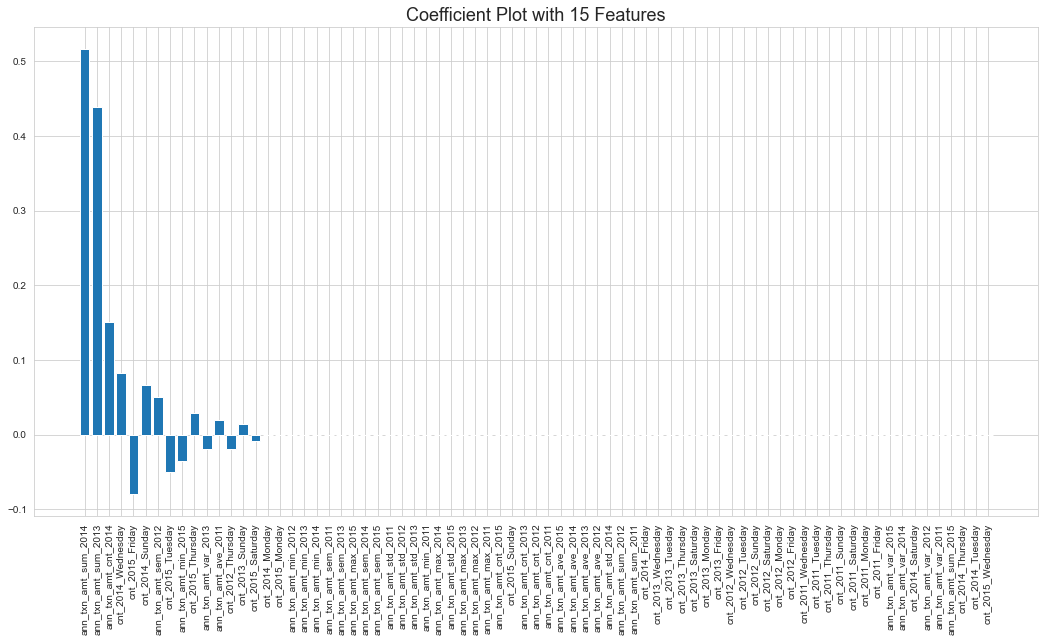

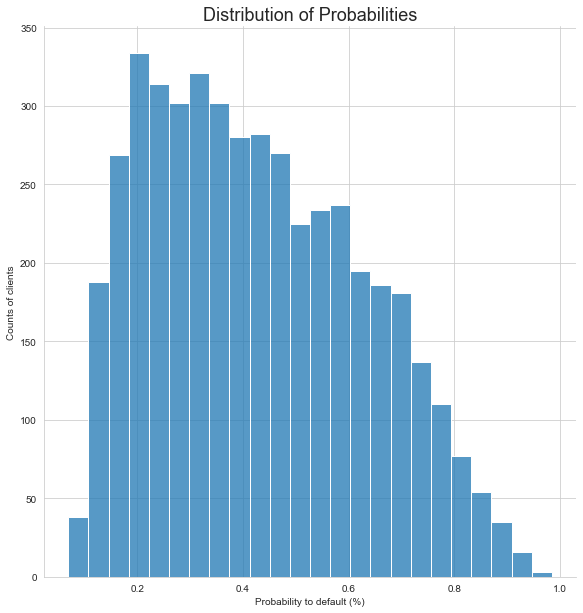

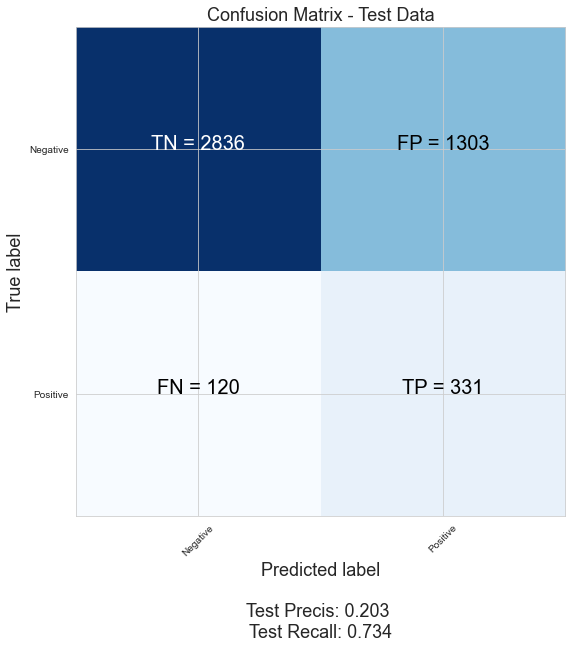

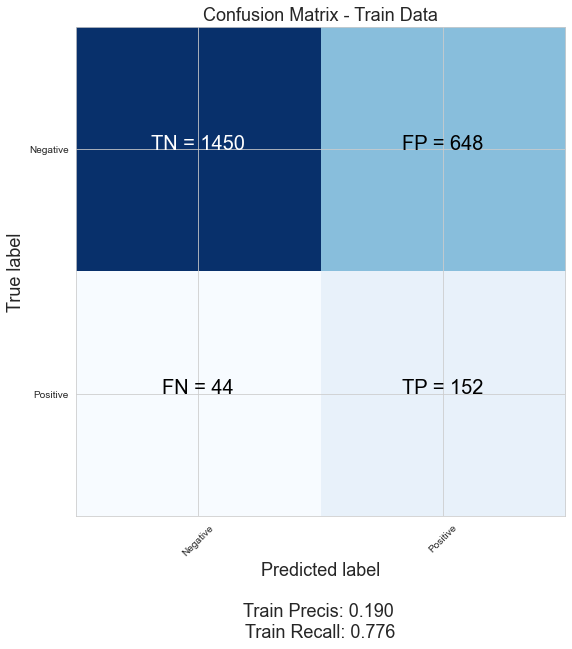

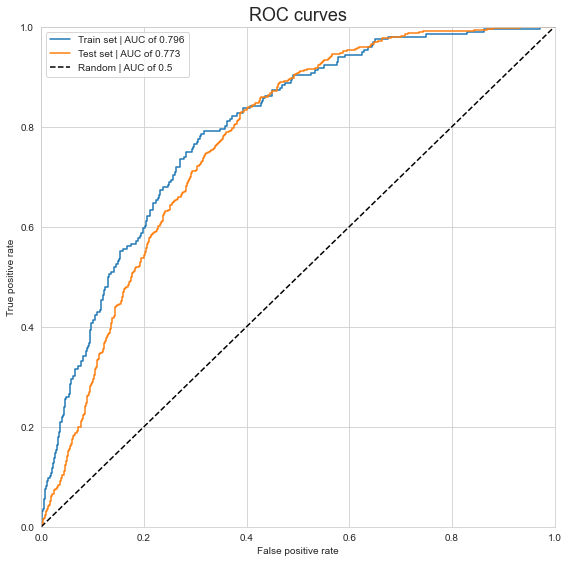

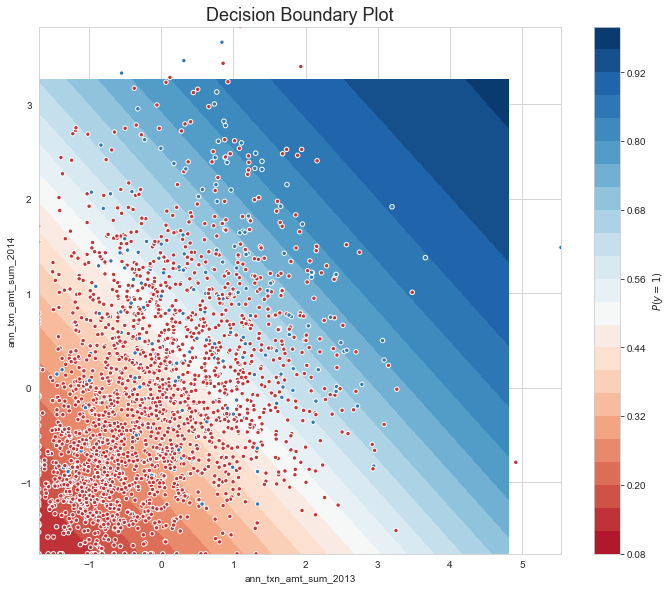

In [47]:
model_annual_lr = optimized_lasso()
plot_coefficient(model_annual_lr)
plot_prob_distribution_testing(model_annual_lr)
plot_cm_roc(model_annual_lr)
plot_decision_boundary(model_annual_lr)

### Logistic Model with L1 Norm(Lasso) for Monthly

Optimized Lasso with C = 0.01 and Testing AUC = 0.658


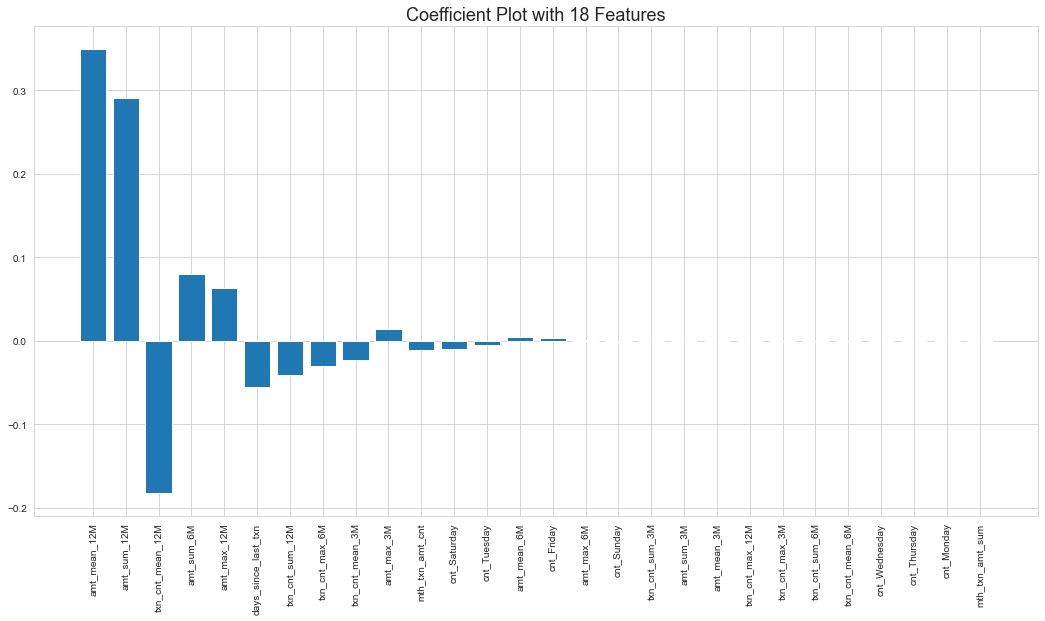

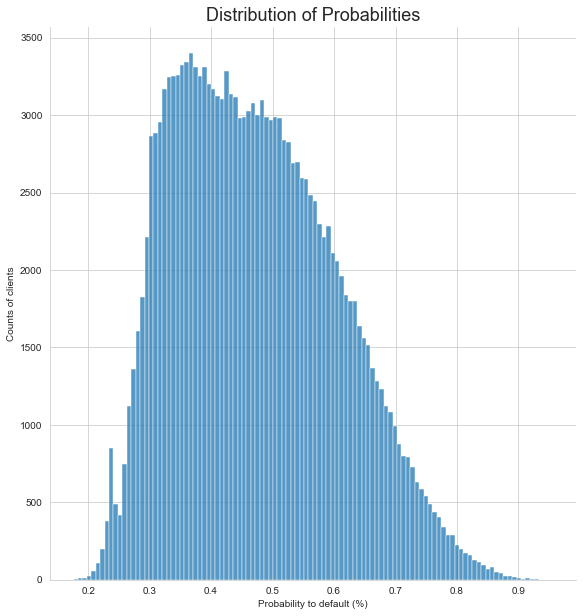

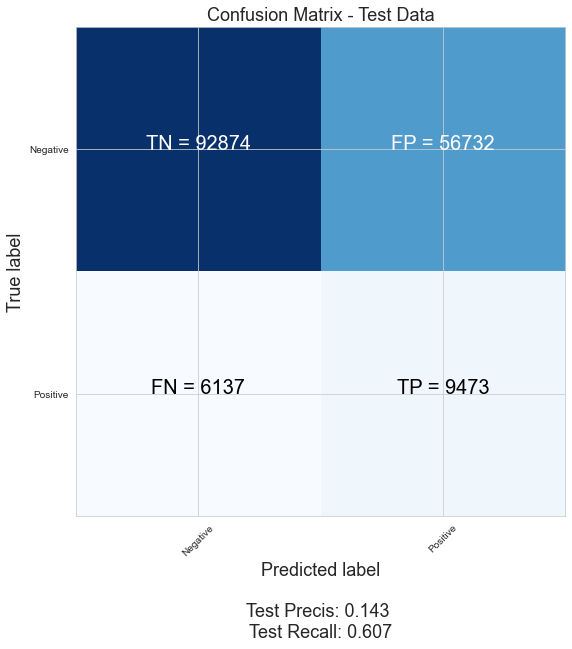

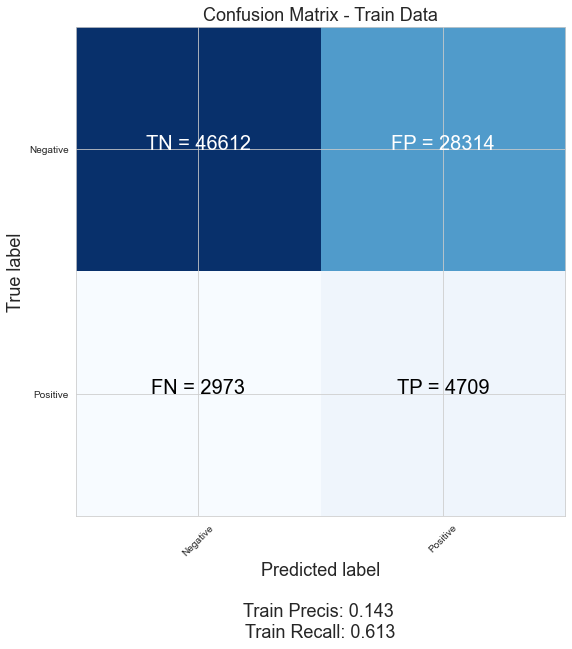

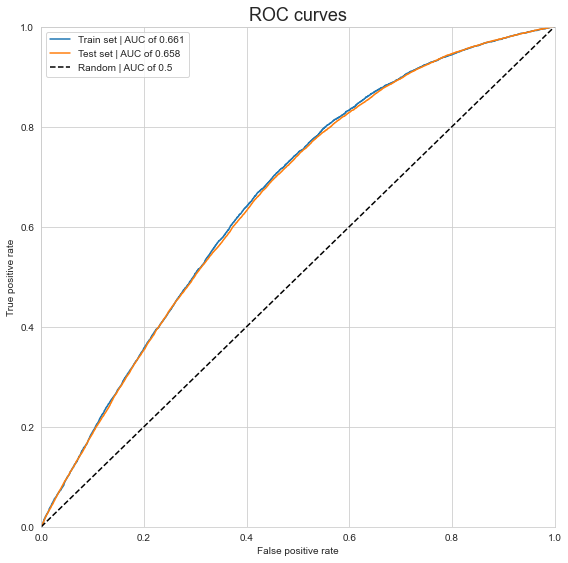

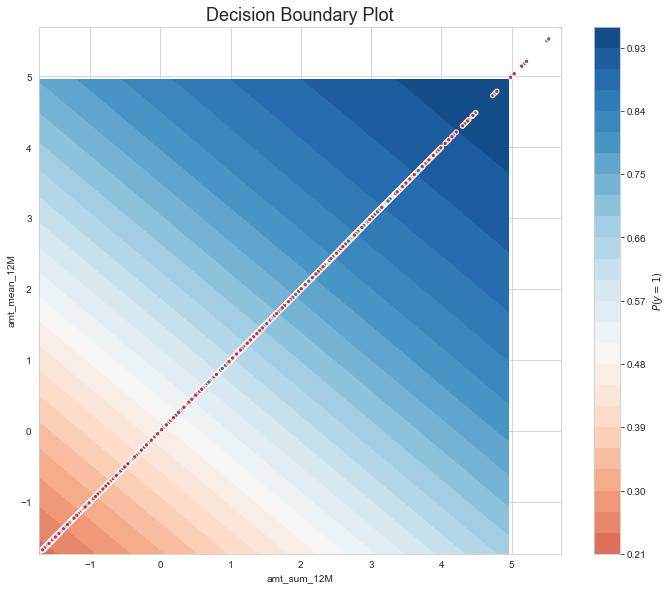

In [48]:
model_monthly_lr = optimized_lasso(dataset='monthly')
plot_coefficient(model_monthly_lr, dataset='monthly')
plot_prob_distribution_testing(model_monthly_lr, dataset='monthly', standardize=True)
plot_cm_roc(model_monthly_lr, dataset='monthly', standardize=True)
plot_decision_boundary(model_monthly_lr, dataset='monthly', standardize=True)

### Decision Model for Annual

In [49]:
def optimized_tree(dataset='annual', mode='decision_tree'):
    # input check
    assert dataset=='annual' or dataset=='monthly',\
        f"dataset can only be 'annual' or 'monthly'."
    assert mode=='decision_tree' or mode=='random_forest',\
        f"mode can only be 'decision_tree' or 'random_forest'."

    # change dataset
    if dataset=='annual':
        X_train, y_train = X_train_annual, y_train_annual
        X_test, y_test = X_test_annual, y_test_annual
    else:
        X_train, y_train = X_train_monthly, y_train_monthly
        X_test, y_test = X_test_monthly, y_test_monthly

    # smaller values, stronger regularization, more coefficients will go to zero
    d_list = range(2, 15)

    # initialize the variables you want to save in an iterative manner
    count                  = 0
    train_auc_iter         = np.zeros(shape=(len(d_list),1))
    test_auc_iter          = np.zeros(shape=(len(d_list),1))

    # loop for all possible optimization values for tree models
    for d in d_list:
        if mode=='decision_tree':
            model_t = DecisionTreeClassifier(max_depth=d, class_weight='balanced', random_state=1147)
        else:
            model_t = RandomForestClassifier(max_depth=d, class_weight='balanced', random_state=1147)
        # fit the model
        model_t.fit(X_train, y_train)
        # scores for train set
        scores_train_t = model_t.predict_proba(X_train)[:, 1]
        # scores for test set
        scores_test_t = model_t.predict_proba(X_test)[:, 1]

        # Training ROC Calc
        fpr_train_t, tpr_train_t, _ = roc_curve(y_train, scores_train_t)
        # Training AUC Calc
        auc_train_t = auc(fpr_train_t, tpr_train_t)
        train_auc_iter[count,0] = auc_train_t
        # Testing ROC Calc
        fpr_test_t, tpr_test_t, _ = roc_curve(y_test, scores_test_t)
        # Testing AUC Calc
        auc_test_t = auc(fpr_test_t, tpr_test_t)
        test_auc_iter[count,0] = auc_test_t
        # next count value for iteration
        count += 1

    # optimize c for Tree Models
    ind_d = pd.DataFrame(test_auc_iter).idxmax()[0]
    print('Optimized Tree/Forest with Max Depth = %d and Testing AUC = %.3f'
          %(d_list[ind_d], max(test_auc_iter)))

    # model with optimized c
    if mode=='decision_tree':
        model_t = DecisionTreeClassifier(max_depth=d_list[ind_d], class_weight='balanced', random_state=1147)
    else:
        model_t = RandomForestClassifier(max_depth=d_list[ind_d], class_weight='balanced', random_state=1147)
    model_t.fit(X_train, y_train)

    # return best model
    return model_t

### Decision Tree Model For Annual

Optimized Tree/Forest with Max Depth = 3 and Testing AUC = 0.742


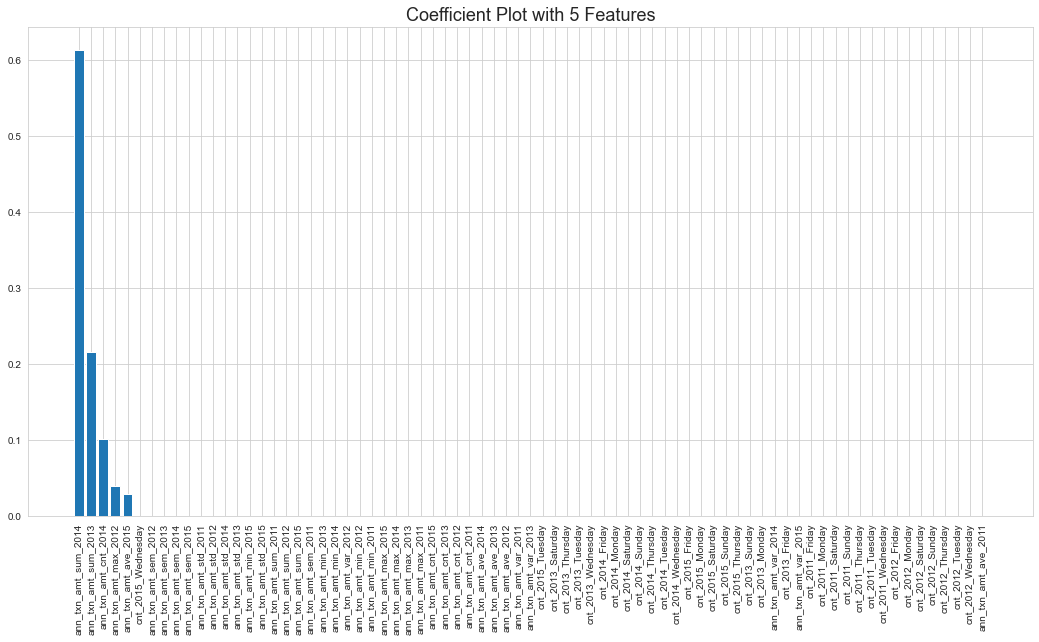

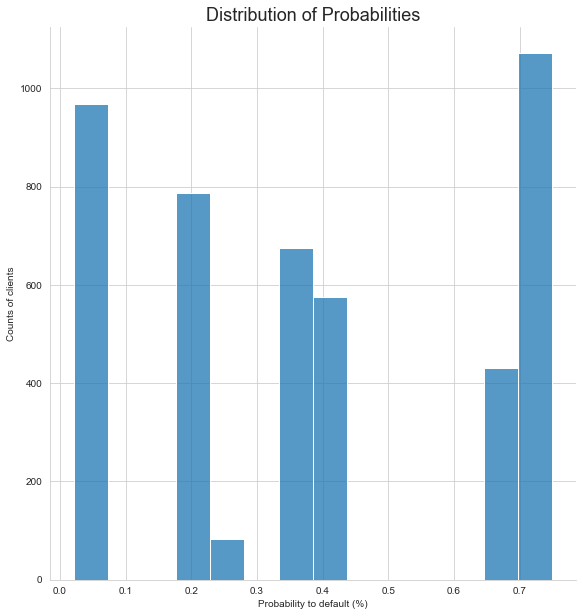

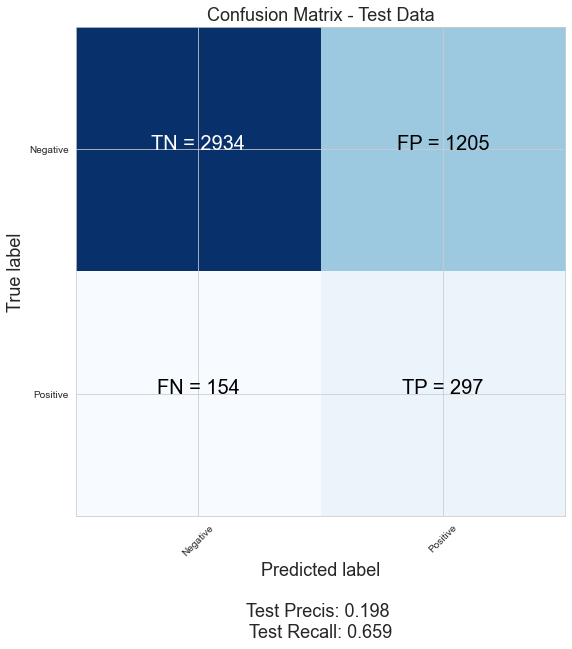

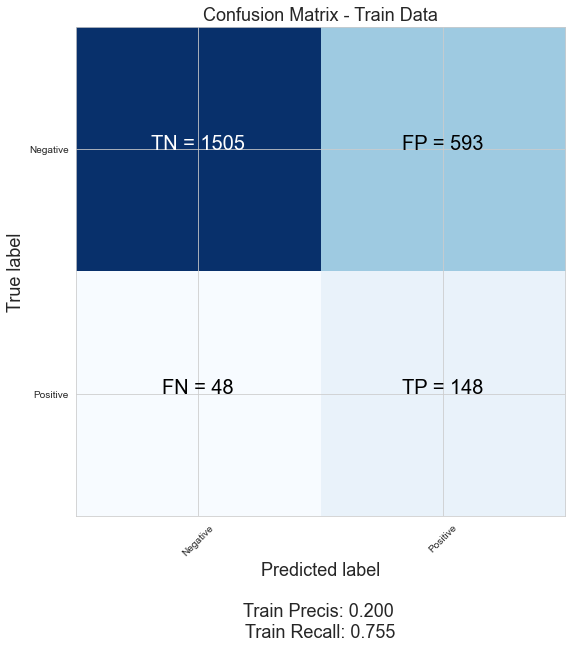

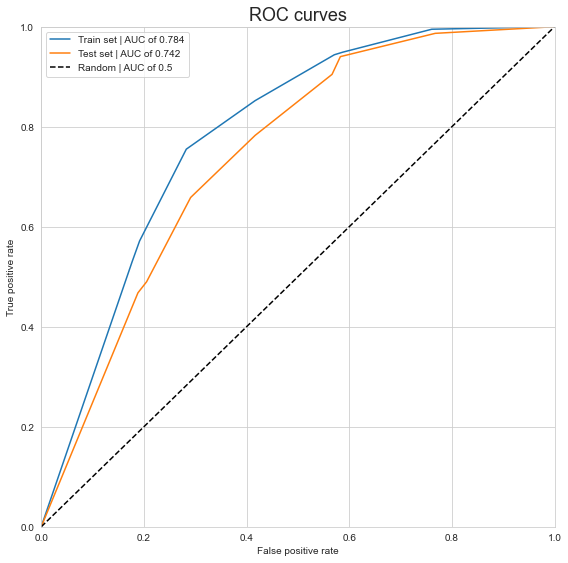

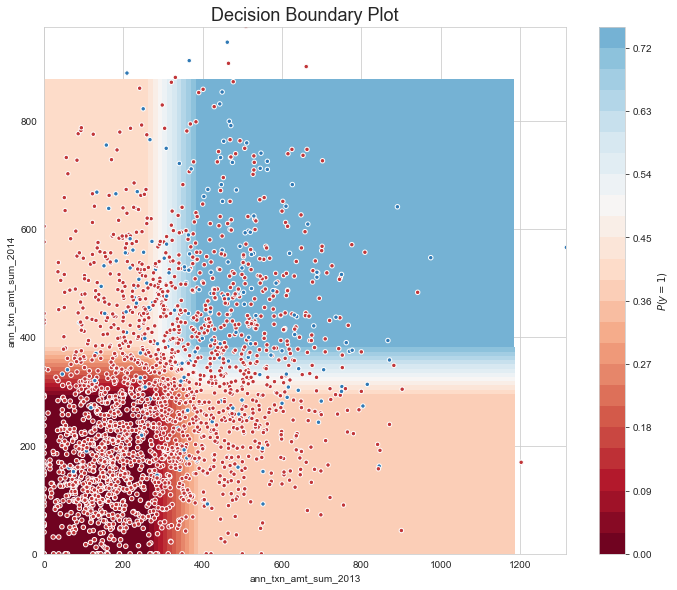

In [50]:
model_annual_t = optimized_tree(dataset='annual', mode='decision_tree')
plot_coefficient(model_annual_t, dataset='annual', is_tree=True)
plot_prob_distribution_testing(model_annual_t, dataset='annual', standardize=False)
plot_cm_roc(model_annual_t, dataset='annual', standardize=False)
plot_decision_boundary(model_annual_t, dataset='annual', standardize=False, is_tree=True)

### Decision Tree Model For Monthly

Optimized Tree/Forest with Max Depth = 5 and Testing AUC = 0.660


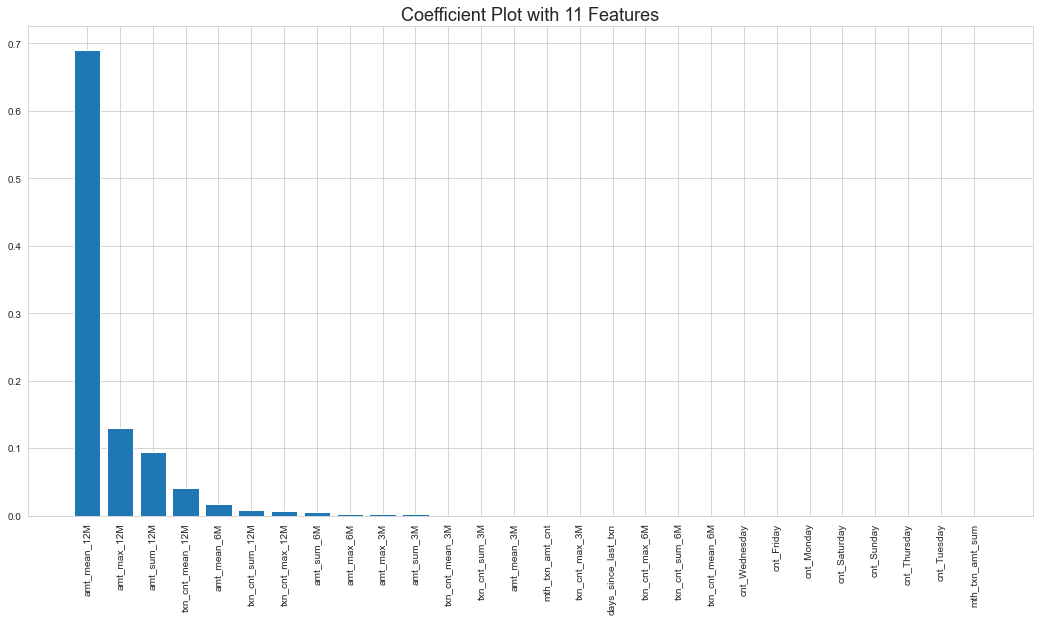

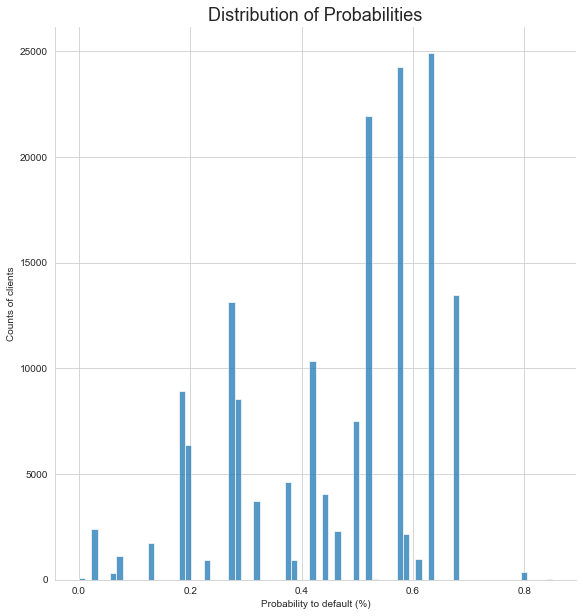

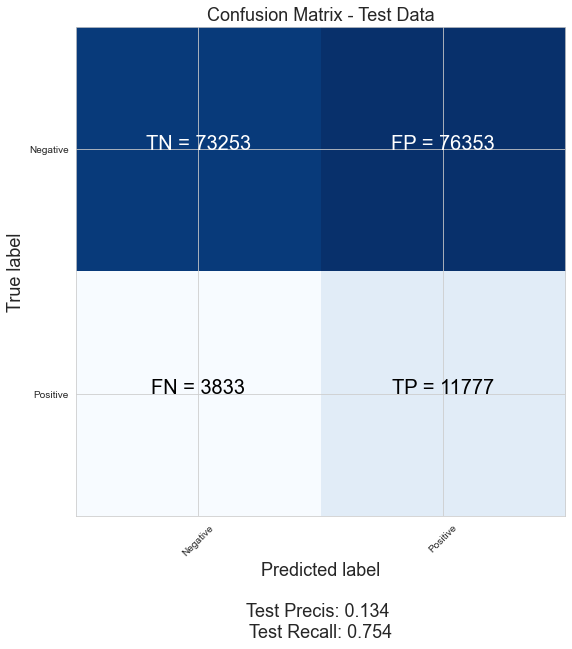

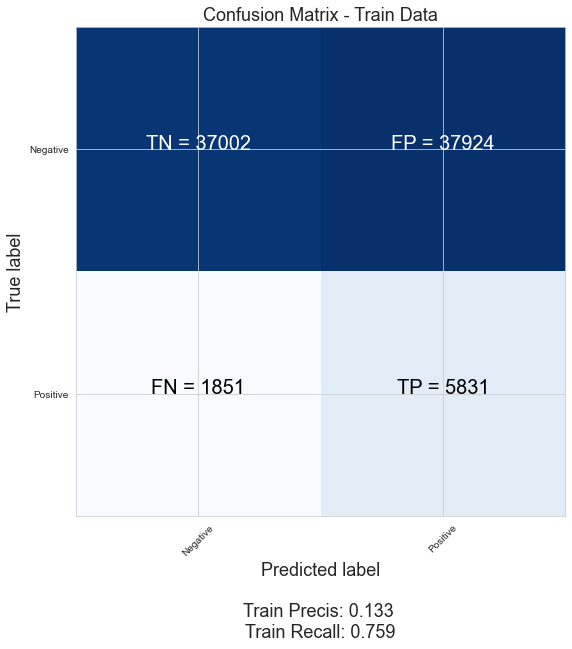

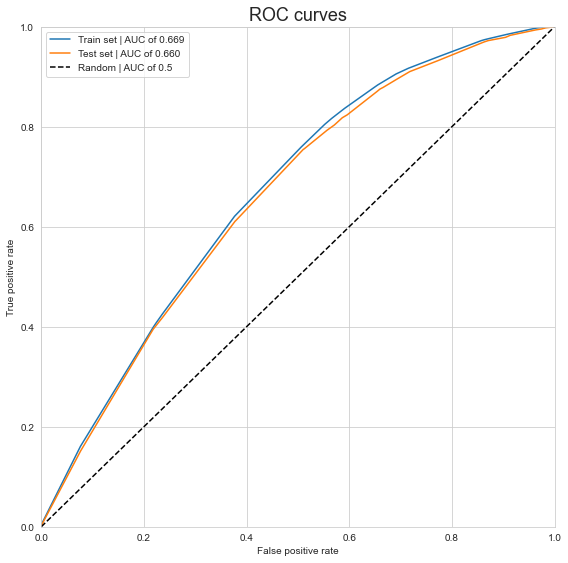

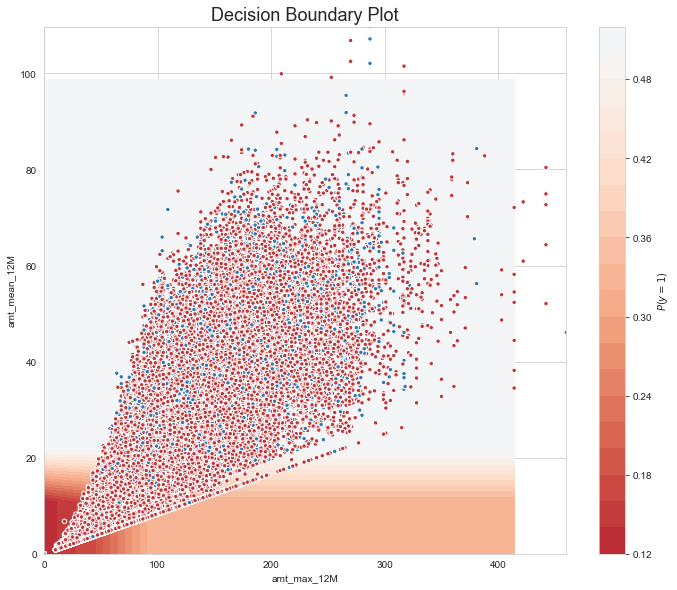

In [51]:
model_monthly_t = optimized_tree(dataset='monthly', mode='decision_tree')
plot_coefficient(model_monthly_t, dataset='monthly', is_tree=True)
plot_prob_distribution_testing(model_monthly_t, dataset='monthly', standardize=False)
plot_cm_roc(model_monthly_t, dataset='monthly', standardize=False)
plot_decision_boundary(model_monthly_t, dataset='monthly', standardize=False, is_tree=True)

### Random Forest Model For Annual

Optimized Tree/Forest with Max Depth = 3 and Testing AUC = 0.748


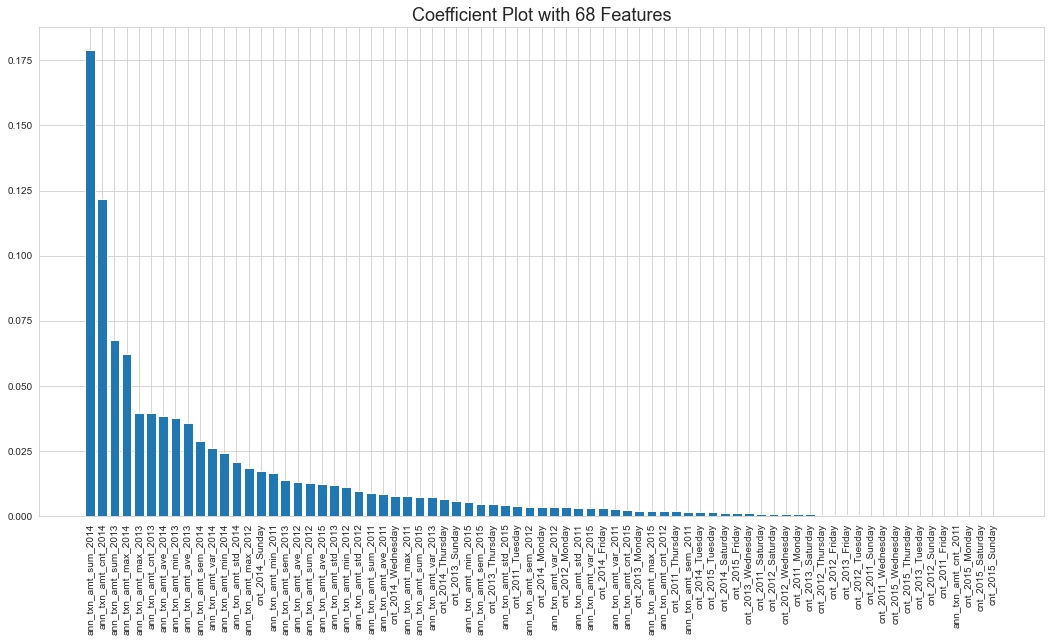

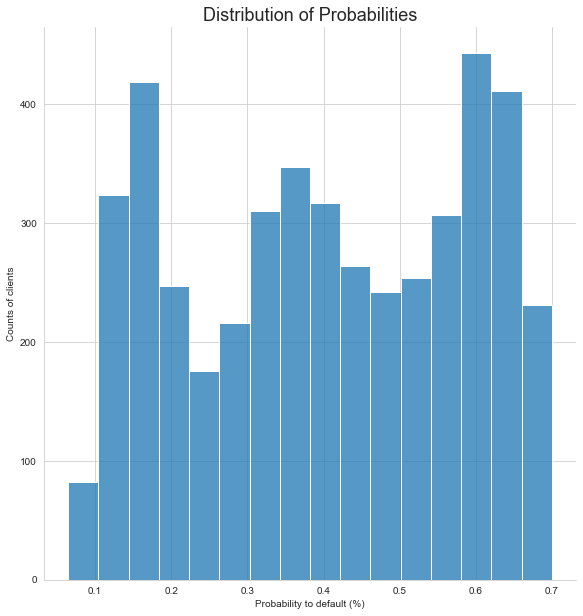

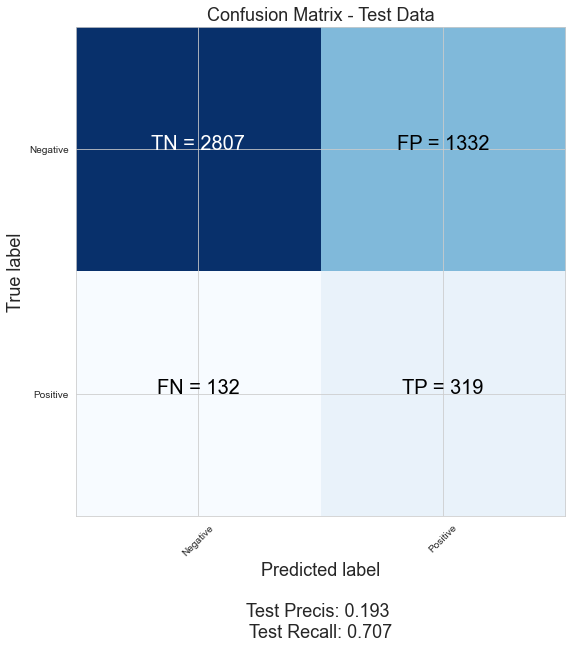

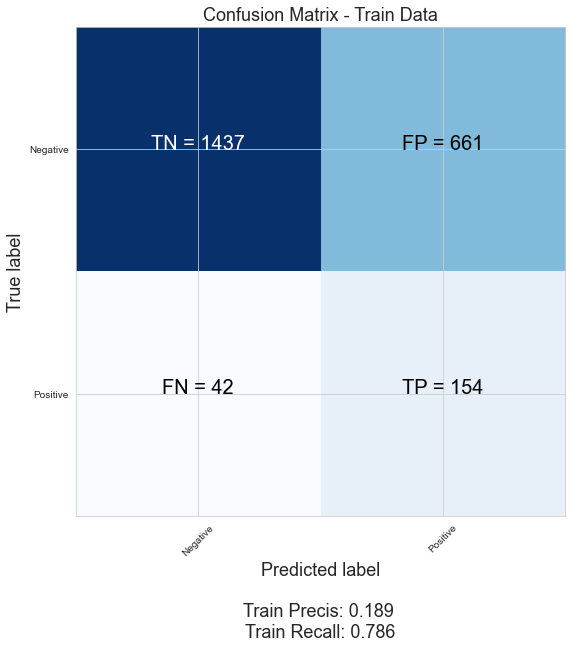

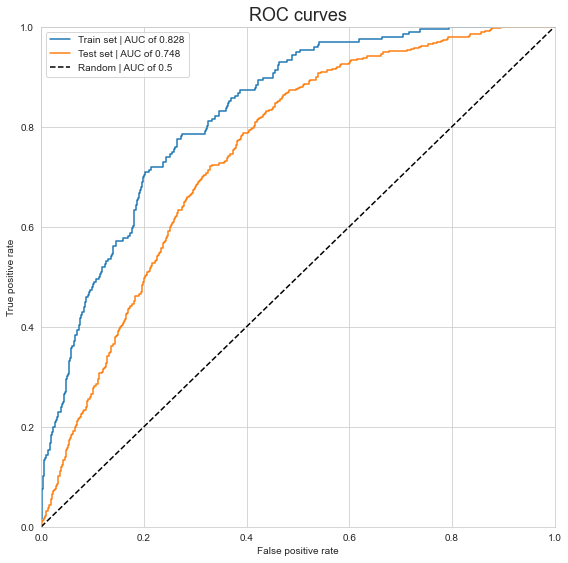

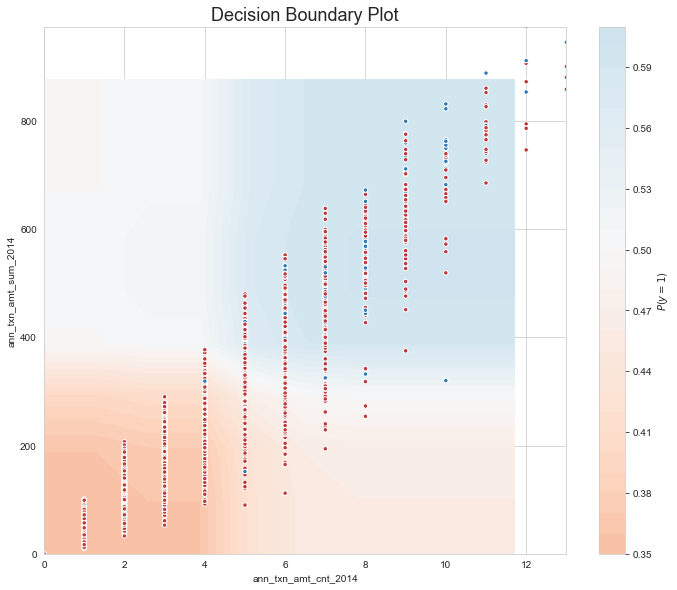

In [52]:
model_annual_t = optimized_tree(dataset='annual', mode='random_forest')
plot_coefficient(model_annual_t, dataset='annual', is_tree=True)
plot_prob_distribution_testing(model_annual_t, dataset='annual', standardize=False)
plot_cm_roc(model_annual_t, dataset='annual', standardize=False)
plot_decision_boundary(model_annual_t, dataset='annual', standardize=False, is_tree=True)

### Random Forest Model For Monthly

Optimized Tree/Forest with Max Depth = 14 and Testing AUC = 0.675


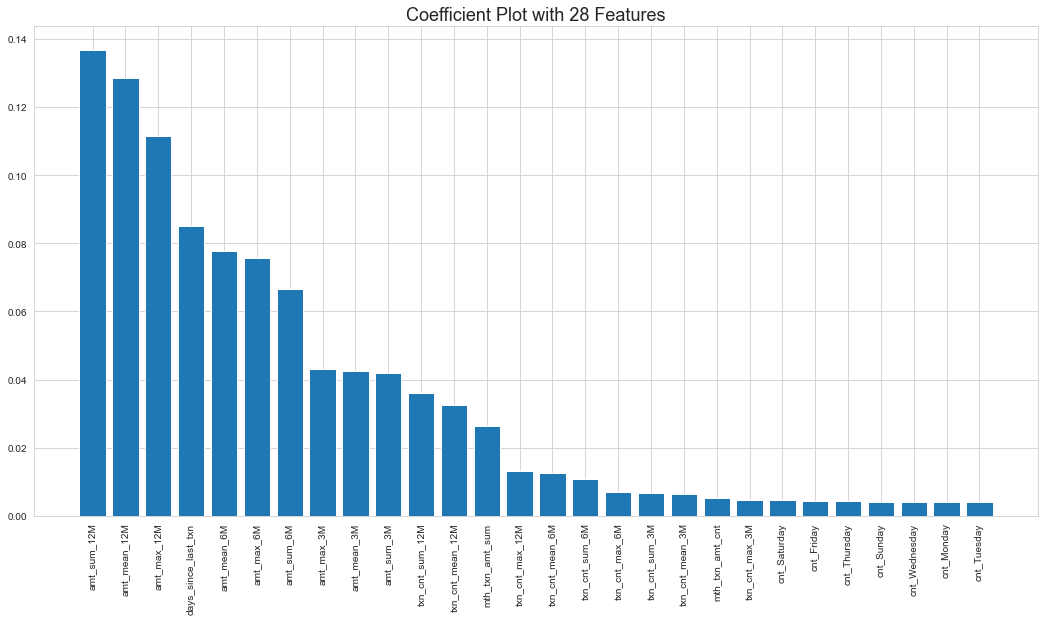

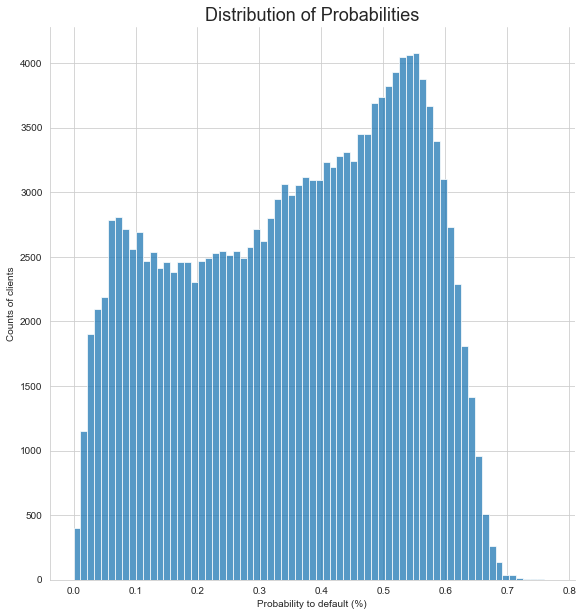

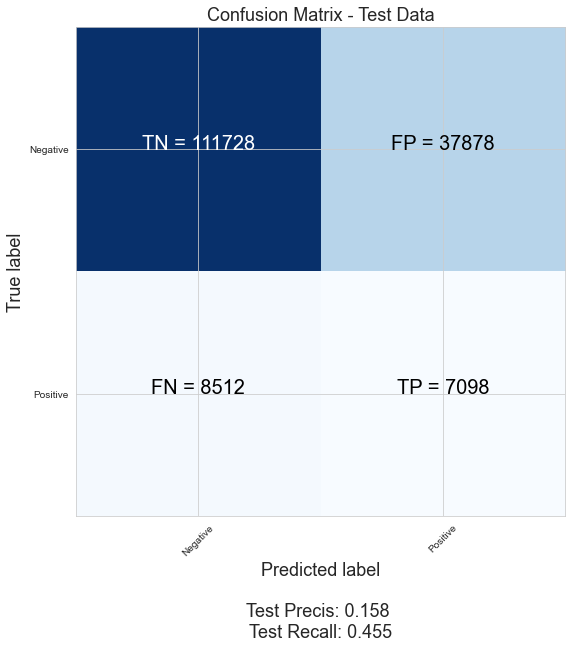

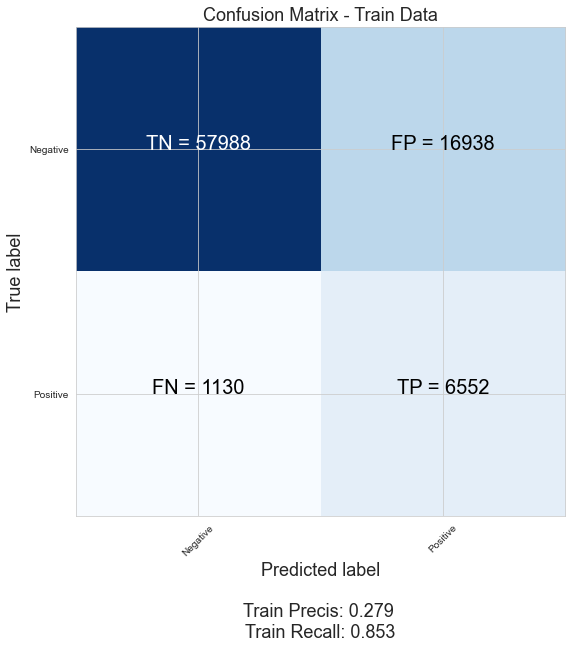

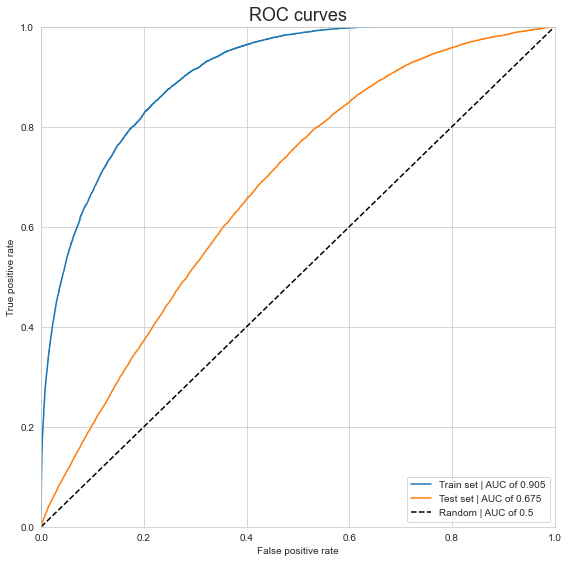

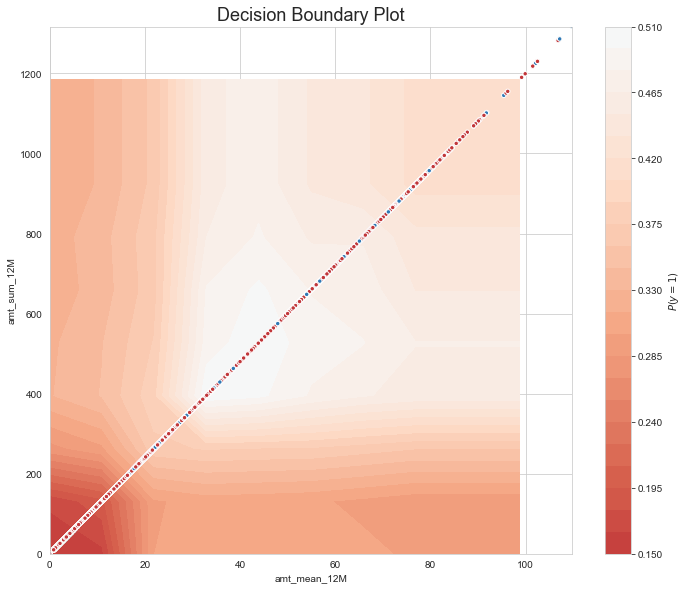

In [53]:
model_monthly_t = optimized_tree(dataset='monthly', mode='random_forest')
plot_coefficient(model_monthly_t, dataset='monthly', is_tree=True)
plot_prob_distribution_testing(model_monthly_t, dataset='monthly', standardize=False)
plot_cm_roc(model_monthly_t, dataset='monthly', standardize=False)
plot_decision_boundary(model_monthly_t, dataset='monthly', standardize=False, is_tree=True)

## 1.3 Comparison of methods

In [10]:
print('Overall Annual Feature Number: %d\n' % X_train_annual_scaled.shape[1])
print('Overall Monthly Feature Number: %d\n' % X_train_monthly_scaled.shape[1])

Overall Annual Feature Number: 75

Overall Monthly Feature Number: 28



Note: The overall optimized parameters are all selected by the best `Testing AUC`.

### Performance Metrics on Annual Data

| Metric/Model Type               | Lasso Regression                       | Decision Tree                                                                                          | Random Forest                                                                                                                       |
|:--------------------------------|:---------------------------------------|:-------------------------------------------------------------------------------------------------------|:------------------------------------------------------------------------------------------------------------------------------------|
| Regularization/Max Depth        | 0.02                                   | 3                                                                                                      | 3                                                                                                                                   |
| Feature Count                   | 15                                     | 5                                                                                                      | 68                                                                                                                                  |
| Top Feature                     | `ann_txn_amt_sum_2014`                 | `ann_txn_amt_sum_2014`                                                                                 | `ann_txn_amt_sum_2014`                                                                                                              |
| Second Feature                  | `ann_txn_amt_sum_2013`                 | `ann_txn_amt_sum_2013`                                                                                 | `ann_txn_amt_cnt_2014`                                                                                                              |
| Prob Distribution of Prediction | Smooth; Slightly right skewed normal   | Gaped; Extremely right skewed normal, >0.7 has an odd increase                                         | Smooth; Left skewed trimodal                                                                                                        |
| Testing AUC                     | 0.773                                  | 0.742                                                                                                  | 0.748                                                                                                                               |
| Testing Precision               | 0.203                                  | 0.198                                                                                                  | 0.193                                                                                                                               |
| Testing Recall                  | 0.734                                  | 0.659                                                                                                  | 0.707                                                                                                                               |
| Training AUC                    | 0.796                                  | 0.784                                                                                                  | 0.828                                                                                                                               |
| Training Precision              | 0.190                                  | 0.200                                                                                                  | 0.189                                                                                                                               |
| Training Recall                 | 0.776                                  | 0.755                                                                                                  | 0.786                                                                                                                               |
| Decision Boundary               | Linear boundaries with wider blue area | Squared boundaries with one high probability blue area, one high probability red area, and two low red | Squared boundaries with one wide low probability blue area, one low probability red area, and one extremely low red and one neutral |




### Performance Metrics on Monthly Data

| Metric/Model Type               | Lasso Regression                         | Decision Tree                                                                             | Random Forest                                                                              |
|:--------------------------------|:-----------------------------------------|:------------------------------------------------------------------------------------------|:-------------------------------------------------------------------------------------------|
| Regularization/Max Depth        | 0.01                                     | 5                                                                                         | 14                                                                                         |
| Feature Count                   | 17                                       | 11                                                                                        | 28                                                                                         |
| Top Feature                     | `amt_mean_12M`                           | `amt_mean_12M`                                                                            | `amt_sum_12M`                                                                              |
| Second Feature                  | `amt_sum_12M`                            | `amt_max_12M`                                                                             | `amt_mean_12M`                                                                             |
| Prob Distribution of Prediction | Dense, Very slightly right skewed normal | Gaped; Left skewed normal, >0.7 has a sudden drop                                         | Smooth; Slightly left skewed bimodal                                                       |
| Testing AUC                     | 0.658                                    | 0.660                                                                                     | 0.675                                                                                      |
| Testing Precision               | 0.143                                    | 0.134                                                                                     | 0.158                                                                                      |
| Testing Recall                  | 0.607                                    | 0.754                                                                                     | 0.455                                                                                      |
| Training AUC                    | 0.661                                    | 0.669                                                                                     | 0.905                                                                                      |
| Training Precision              | 0.143                                    | 0.133                                                                                     | 0.279                                                                                      |
| Training Recall                 | 0.613                                    | 0.759                                                                                     | 0.853                                                                                      |
| Decision Boundary               | Linear boundaries with wider blue area   | Squared boundaries with one large low probability blue area, one high red and one low red | Squared boundaries with one extremely large low probability red, and one high red, no blue |



### Annual Model Selection - Lasso Regression

For the annual data, I would say all three models have relatively close performance on all metrics.

 The distinct quantitative metrics are `Feature Count`,  `Testing AUC`, `Testing Recall` and `Training AUC`:

- `Feature Count`: Random Forest model uses 68 features out of 77, which is not acceptable, this show the model is poor on doing feature selection; Decision Tree is quite opposite by using only 5 features, which can be considered as too few.
- `Testing AUC`: The Lasso model is 3% higher than tree models.
- `Testing Recall`: The Lasso model is at 73.4% and Decision Tree is at 65.9% which is too low.
- `Training Recall`: The Lasso and Random Forest all have good performance, one at 77.6% and the other at 78.6%

The distinct qualitative metrics are `Second Feature`, `Prob Distribution of Prediction` and `Decision Boundary`:

- `Second Feature`: The Random Forest's pick is different from the other two, which is `ann_txn_amt_cnt_2014`.
- `Prob Distribution of Prediction`: The prediction distributions of tree models are worrisome: the Decision Tree always has gaps in its prediction distribution, and the pattern is not normal, and  Random Forest have tree peaks.
- `Decision Boundary`: The decision boundary comparison is hard for this task, since the overall precision is bad(close to 20%) for all models, which means no model can truly separate the two responses.

**Therefore, based on all the distinct quantitative and qualitative metrics, I would choose Lasso model as the best performer. Especially because of its higher Testing Recall, it shows the model can keep more percentage of clients who responded positively to the campaign. And the prediction has good normality.**


### Monthly Model Selection - Decision Tree

For the monthly data, it is certainly a higher task than handling the annual dataset, which causes no overall winner. Depends on the use cases, any one of them can be the best.

The distinct quantitative metrics are `Max Depth`, `Feature Count`, `Testing Recall`, `Training AUC`, `Training Precision`, and `Training Recall`:

- `Max Depth`: The Random Forest model uses the possible maximum depth(range is 2 to 14 inclusive) which is a sign of overfitting.
- `Feature Count`: The Random Forest uses all 28 features, which is a poor feature selection and overfitting.
- `Testing Precision`: The Random Forest has the highest among all three model (15.8% compare to 13.4% for Decision Tree and 14.3% for Lasso)
- `Testing Recall`: The Random Forest gets significantly poor performance than the other two models(45.5% compare to 75.4% for Decision Tree and 60.7% for Lasso), which is expected since RF over-fits the training set.
- `Training AUC`, `Training Precision`, and `Training Recall`: Here are more evidences of RF is overfitting.

The distinct qualitative metrics are `Second Feature`, `Prob Distribution of Prediction` and `Decision Boundary`:

- `Second Feature`：The Decision Tree has a unique pick which is `amt_max_12M`.
- `Prob Distribution of Prediction`: Very similar pattern as the annual data one, Lasso has the overall best normal shape.
- `Decision Boundary`: The decision boundary comparison is still hard, because overall precision is bad(close to 15%) for all models, which means no model can truly separate the two responses.

**Therefore, we can see the RF is an awful performer here(unless we need to get high Testing Precision; otherwise, we will not consider using this model. In our cases, higher precision means the prediction of not interested client is more precise). Lasso and Decision Tree also have their specializations, one has overall good performance on testing set with and the other has higher testing recall, but due to DT has use a different second feature, which can make the result questionable. If I have to make a decision, I will choose the Decision Tree, but with low confidence.**




### Overall Pick - Lasso Regression model with Annual Data

**Overall, the Lasso Regression model with Annual Data is the best combination for getting correct response, and output the most meaningful result, which retains the most of the clients who responded positively to the campaign.**